In [38]:
import json
from collections import defaultdict as dd
import matplotlib.pyplot as plt
fp = open('result.json')
f = open('repo_count.json')
repo_count_str = f.read()
result_str = fp.read()
result_data = json.loads(result_str)
repo_count_data = json.loads(repo_count_str)

In [39]:
python_files = []
final_result_data = {}
temp = []
for i in repo_count_data:
    try:
        final_result_data[i]=result_data[i]
    except:
        temp.append(i)
        continue
for i in temp:
    del repo_count_data[i]

star_count = {}
lambda_count = {}

for i in repo_count_data:
    star_count[i] = float(final_result_data[i][:-1])
    lambda_count[i] = repo_count_data[i]



Text(0, 0.5, 'Number of occurrences of lambda')

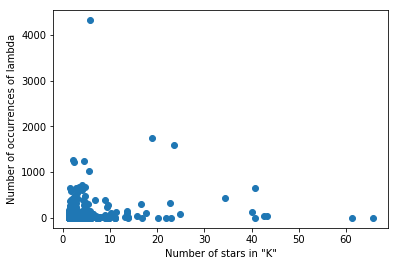

In [40]:
plt.scatter(list(star_count.values()),list(lambda_count.values()))
plt.xlabel('Number of stars in "K"')
plt.ylabel('Number of occurrences of lambda')